# Random Forest

Random Forest is the most used Supervised Learning algorithm for Regression and Classification <br>
Random Forests are made out of Decision Trees <br> <br>

A random forest consists of multiple random decision trees. Two types of randomnesses are built into the trees. First, each tree is built on a random sample from the original data. Second, at each tree node, a subset of features are randomly selected to generate the best split. <br><br>

Random Forests use **Ensemble Learning** method in which predictions are based on combined results of various individual models

## why Random Forest?

Decision Trees are highly interpretable, but due to their simplicity, they have low bias and high variance i.e. Decision Trees tend to overfit the training data

## Bagging
**Bootstrapping** the data and using it's **aggregate** to make a decision is known as **Bagging**. <br>
**Bootstrapping** --> **Random sampling with replacement** <br>
**Aggregation**   --> **Combining results of multiple models** <br><br>

In other words, Bagging is training a bunch of individual models parallely, where each model is trained on a random subset of data with resampling (each subset is of same size) and combining the output or prediction of all these (weak) models via **voting for classification** or **average for regression**

## Boosting
**Boosting** is training a bunch of individual models in a **sequential** way. Each individual model learns from mistaked made by previous model.

**NOTE:**  Random Forest doesn't work on Boosting. It is based on Bagging

## Advantages and Disadvantages of Random Forest

### Advantages of Random Forest
- It reduces overfitting in decision trees and helps to improve the accuracy
- It is flexible to both classification and regression problems
- It works well with both categorical and continuous values
- It automates missing values present in the data
Normalising of data is not required as it uses a rule-based approach


### Disadvantages of Random Forest
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs
- It also requires much time for training as it combines a lot of decision trees to determine the class
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable 
- It naturally makes the model biased towards features with more number of classes. This can be prevented by Feature selection

### inTrees (interpretable trees)

Due to ensembling, the partial dependency of each feature i.e. each feature (individually) and their correlation to target variable alongwith each feature's importance score such as Gini Impurity can be misleading to interpret (understand) the model. This is because features may react with each other and then affect the target variable. <br>
Neither importance scores nor partial dependency plots tell how multiple features interact with the class.<br>

The <b>inTrees</b> framework can be used to gain a clearer picture of what happens inside a random forest. <br><br>
The inTrees (interpretable trees) framework extracts, measures, prunes and selects rules from a tree ensemble, and calculates frequent variable interactions. <br>
The inTrees framework can be applied to both classification and regression problems, and is applicable to many types of tree ensembles, e.g., random forests, regularized random forests, and boosted trees.<br>
Use inTrees packages to build Random Forest learning models.

### Handling redundant features

Features that are similar to each other (such as beard and facial hair), the importance scores of these features can be misleading. This may not hurt the accuracy performance but could be misleading in interpretation.<br>
One solution would be the <b>regularized random forest (RRF)</b>.<br>
In the tree building process, RRF memorizes the features used in previous tree nodes. While building future tree nodes, it evaluates all the features and prefers previously memorized features in splitting future treee nodes, therefore avoiding redundant features in the trees.

## Creating a Random Forest

### Step 1: Create 'n' Bootstrap datasets/random subsets
The <u>Bootstrap</u> method is a resampling technique on a population by sampling a dataset with replacement. <br><br>

The Bootstrap dataset, which is same size as the original dataset is created by randomly selecting samples from the original dataset. This involves random selection with replacement. <br>
Simply put, in each sub-dataset created, not only are data points selected (from the original dataset) at random, but they are also repeated (i.e. occurence of a data point more than once in each sample is allowed). <br><br>

This process is repeated to create 'n' subsets of data

### Step 2: Training 'n' Decision Trees
Here, we make use of the fact that Decision Trees have high bias towards the data they are trained on: they produce different results based on their training data. <br>
So, for every Bootsrapped data, we create a Decision Tree <br>
While creating each Decision Tree, use a random subset of features at each step  (2 only/3 only/etc). <br>
While training different Decision Trees for different subsets, use different number of features (2,3,400, etc) <br>




### Step 3: Use Out-of-Bag Dataset for testing
Because of random resampling with replacement, some data points (20-30%) from the original dataset will not be used to train any Decision Tree. This data is referred to as **Out-of-Bag data** <br>
Since this data is unseen to all the Decision Trees, we use this data to test the performance of Decision Trees and our ensamble model instead of splitting the original dataset into train-test set as we do while using other learning algorithms


### Step 4: Aggregating the outputs of all models
The outputs of all (weak) models are aggregated to produce a strong model. <br>
For **Classification models, voting** is done based on prediction by each model and the class with most votes is the final prediction <br>
For **Regression models, average** of all models is the final prediction

![randomForest.png](images/randomForest.png)

## Random Forest using scikit-learn

### Random Forest Regressor using scikit-learn

In [1]:
# import libraries 

import pandas as pd
import numpy as np

In [2]:
# import data

df = pd.read_csv("weatherData.csv")

df.sample(4)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
48,2016,2,20,Sat,53,51,50.4,53,48,55,51,43
83,2016,3,27,Sun,57,59,55.3,51,52,58,55,39
115,2016,4,28,Thurs,60,61,61.0,64,56,65,62,73
119,2016,5,2,Mon,68,77,61.9,87,60,66,61,59


In [3]:
# data cleaning

print('Shape :', df.shape)

Shape : (348, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
# one-hot encoding

data = pd.get_dummies(df)

data.iloc[:, 5:].head(4)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0


In [7]:
labels = np.array(data['actual'])

In [8]:
data = data.drop('actual', axis = 1)

features = list(data.columns)

data = np.array(data)

In [9]:
# test-train split

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.25, random_state=42)

In [10]:
# setting a baseline for measuring model'sp performance

baseline_preds = test_X[:, features.index('average')]

baseline_err   = abs(baseline_preds - test_y)

print('Average baseline error: ', round(np.mean(baseline_err), 2))

Average baseline error:  5.06


In [11]:
print(train_X.shape, train_y.shape)

(261, 17) (261,)


In [12]:
# train the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_X, train_y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [13]:
pred = rf.predict(test_X)

In [14]:
# evaluate model performance

from sklearn.metrics import r2_score, mean_absolute_error

print('Mean Absolute Error :', mean_absolute_error(pred, test_y))
print('R2 score :', r2_score(pred, test_y))

Mean Absolute Error : 3.8731954022988506
R2 score : 0.7638372120725536


In [15]:
# build a model without train-test-split using Out of Bag Dataset

model = RandomForestRegressor(n_estimators=1000, random_state=42, oob_score=True)
model.fit(data, labels)
print('OOB score :', model.oob_score_)

OOB score : 0.8232529474711994


### Random Forest Classifier using sklearn

In [16]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# import data

from sklearn import datasets

iris = datasets.load_iris()

In [18]:
print('Features :', iris.feature_names)
print('Targets  :', iris.target_names)

Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets  : ['setosa' 'versicolor' 'virginica']


In [19]:
data = pd.DataFrame({
                     'sepal length':iris.data[:,0],
                     'sepal width':iris.data[:,1],
                     'petal length':iris.data[:,2],
                     'petal width':iris.data[:,3],
                     'species':iris.target  })

In [20]:
data.sample(4)

,sepal length,sepal width,petal length,petal width,species
64,5.6,2.9,3.6,1.3,1
2,4.7,3.2,1.3,0.2,0
140,6.7,3.1,5.6,2.4,2
6,4.6,3.4,1.4,0.3,0


In [21]:
# since this dataset is known to be already clean, we do not need to perform any data cleanin operations or EDA

In [22]:
# train-test split

from sklearn.model_selection import train_test_split

X, y = data.drop('species', axis=1), data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
# model building

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
pred = rfc.predict(X_test)

In [25]:
from sklearn import metrics

print("Accuracy :", metrics.accuracy_score(y_test, pred))

Accuracy : 1.0


### Finding important features in scikit-learn

Random forests also offers a good feature selection indicator.<br>
Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction.<br>
It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

- First, you need to create a random forests model
- Second, use the feature importance variable to see feature importance scores
- Third, visualize these scores using the seaborn library.

In [26]:
# using feature_importances_ attribute of Random Forest Classifier object to get importance of each feature

feature_imp = pd.Series(rfc.feature_importances_,
                        index=iris.feature_names).sort_values(ascending=False)

In [27]:
feature_imp

petal width (cm)     0.509061
petal length (cm)    0.407781
sepal length (cm)    0.054909
sepal width (cm)     0.028249
dtype: float64

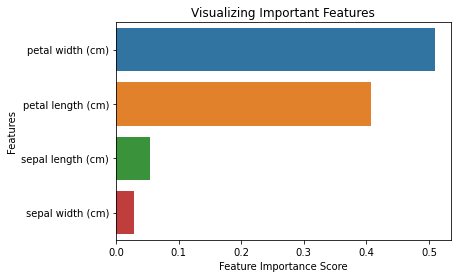

In [28]:
# visualizing feature importance

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [29]:
# using this knowledge, generate model using only important features
# here, drop 'sepal width' feature

X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


### Random Forest and Outliers

Usually, outliers will have a negligible effect when dealing with Tree based models because the nodes are determined based on the sample proportions in each split region and not on their absolute values. That being said if that dataset is small, it still might have an impact. <br><br>
    
Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.<br><br>

Random Forest can be used to find Outliers in a dataset by

- Create a synthetic dataset of the same size as the original data. This random data set contrasts with the original data by randomly permuting each feature. The two datasets are labeled with two classes (say, “normal” and “random”) and combined
- A random forest is built on the dataset. Random Forest classifier can be applied to test data instances
- If the predicted class is “random”, then it is identified as an outlier

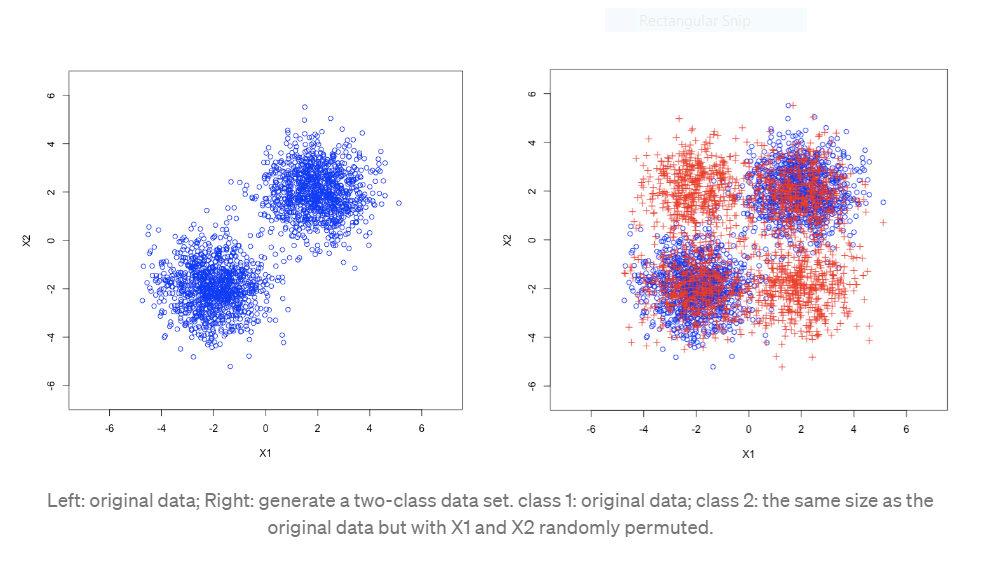

**Outlier Detection using Original and synthetic dataset and Random Forest Classifier:**

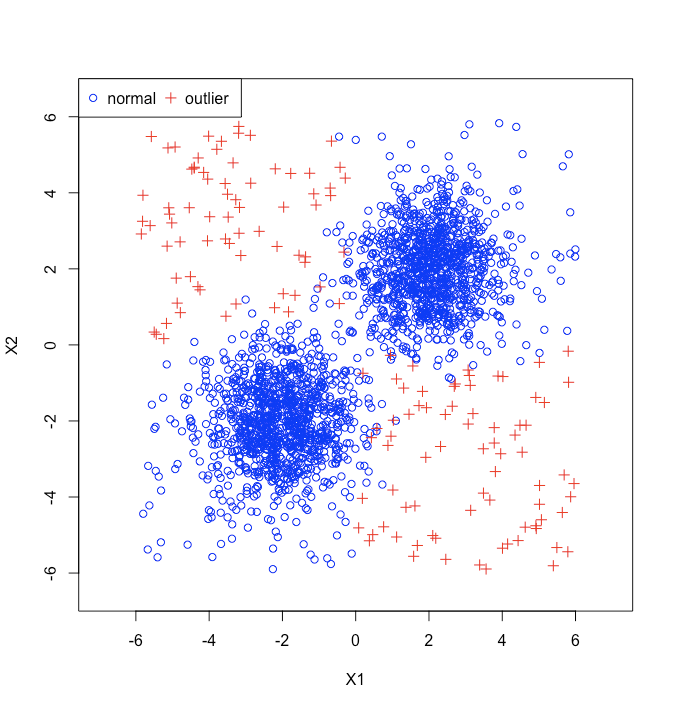

### Clustering with Random Forest

Similar to outlier detection, clustering with random forests saves efforts in feature preprocessing.<br><br>
    
The procedure is similar to outlier detection. <br>
- Create a synthetic dataset of the same size as the original data
- Label the original data and synthetic class with two different classes
- Build a Random Forest Classifier on combined dataset
- From the built random forest, a similarity score between each pair of data instances is extracted. The similarity of two data instances is measured by the percentage of trees where the two data instances appear in the same leaf node
- With the similarity scores, clustering algorithms such as hierarchical clustering can then be used for clustering. 

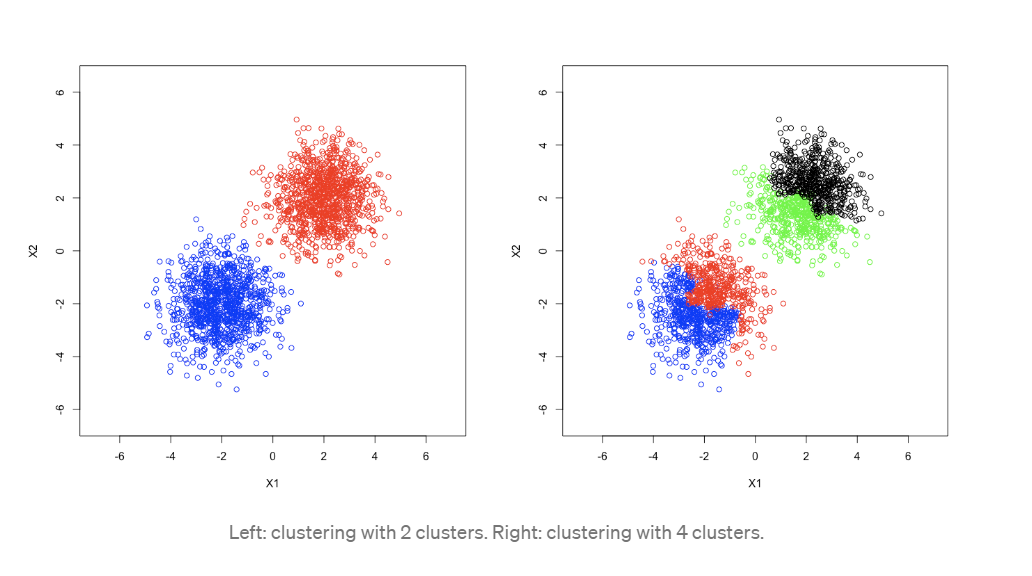